# Sentiment Analasis

In [11]:
# Ensure all required packages are installed
%pip install pandas numpy matplotlib seaborn nltk scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Note: you may need to restart the kernel to use updated packages.


## import imdb.csv file

In [12]:
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
df.info()
df['sentiment'].value_counts()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## 2 Text Preprocessing

In [29]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['review_processed'] = df['review'].apply(preprocess_text) # them cot moi
df[['review', 'review_processed']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...


,review,review_processed
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


### Vector: use TfidVectorizer

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X=tfidf_vectorizer.fit_transform(df['review_processed']).toarray()
y=df['sentiment'].apply(lambda sentiment: 1 if sentiment == 'positive' else 0)

print("Kich thuoc ma tran dac trung X (TF-IDF):", X.shape)
print("Kich thuoc vector nhan y:",y.shape)


Kich thuoc ma tran dac trung X (TF-IDF): (50000, 5000)
Kich thuoc vector nhan y: (50000,)


### Chia tap du Lieu

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print("Kich thuoc tap huan luyen:", X_train.shape)
print("Kich thuoc tap kiem tra:",X_test.shape)



Kich thuoc tap huan luyen: (40000, 5000)
Kich thuoc tap kiem tra: (10000, 5000)


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

print("Dang Huan luyen mo hinh Logistic Regression...")

# Tao doi tuong mo hinh Logistic Regression

logreg_model = LogisticRegression(
    random_state= 42,
    max_iter=1000
)

logreg_model.fit(X_train,y_train)

print("Huan luyen mo hinh Logistic Regression hoan thanh!")

Dang Huan luyen mo hinh Logistic Regression...
Huan luyen mo hinh Logistic Regression hoan thanh!


## Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

print("Dan huan luyen mo hinh Multinomial Naive Bayes...")
nb_model  = MultinomialNB()

nb_model.fit(X_train, y_train)

print("Huan luyen mo hinh Multinomial Naive Bayes hoan thanh!")

Dan huan luyen mo hinh Multinomial Naive Bayes...
Huan luyen mo hinh Multinomial Naive Bayes hoan thanh!


## Linear SVM 

In [43]:
from sklearn.svm import LinearSVC

print("Dang huan luyen mo hinh Linear SVM...")

svm_model = LinearSVC(
    random_state=42,
    max_iter=2000
)

svm_model.fit(X_train, y_train)
print("Huan luyen mo hinh Linear SVM hoan thanh!")

Dang huan luyen mo hinh Linear SVM...
Huan luyen mo hinh Linear SVM hoan thanh!


## Random Forest Classifier

In [44]:
from sklearn .ensemble import RandomForestClassifier

print("Dang huan luyen mo hinh Random Forest Classifier...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train,y_train)
print("Huan luyen mo hinh Random Forest classifier hoan thanh!")


Dang huan luyen mo hinh Random Forest Classifier...
Huan luyen mo hinh Random Forest classifier hoan thanh!


## Danh Gia Mo hinh

### Du doan tren tap kiem tra

In [48]:
print("Dang du doan tren tap kiem tra...")
longreg_pred = logreg_model.predict(X_test)

nb_pred = nb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Du doan hoan tat!")

Dang du doan tren tap kiem tra...
Du doan hoan tat!


### Tinh toan va in ket qua danh gia


========== Đánh giá Mô hình: Logistic Regression ==========
Accuracy: 0.8848

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Confusion Matrix:


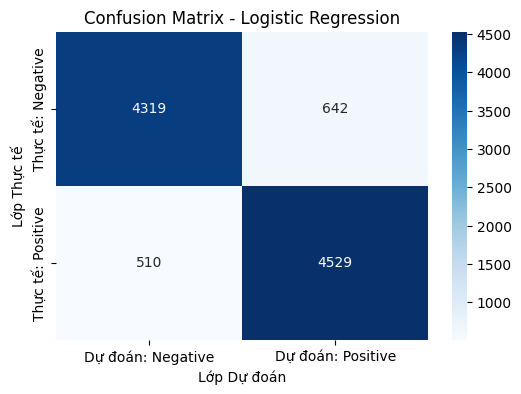


========== Đánh giá Mô hình: Multinomial Naive Bayes ==========
Accuracy: 0.8490

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:


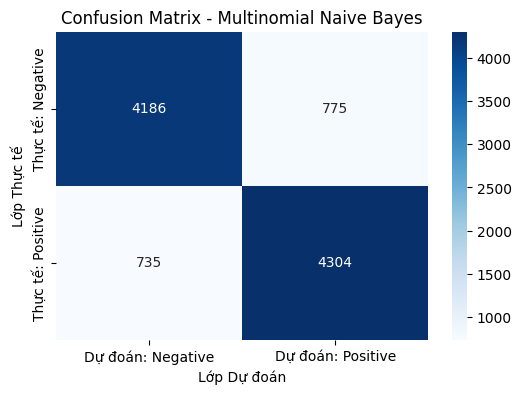


========== Đánh giá Mô hình: Linear SVM ==========
Accuracy: 0.8790

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:


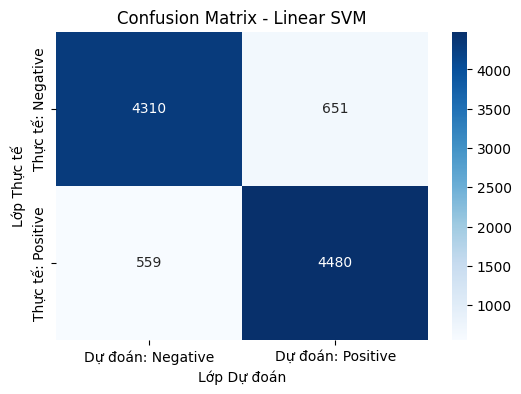


========== Đánh giá Mô hình: Random Forest ==========
Accuracy: 0.8504

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:


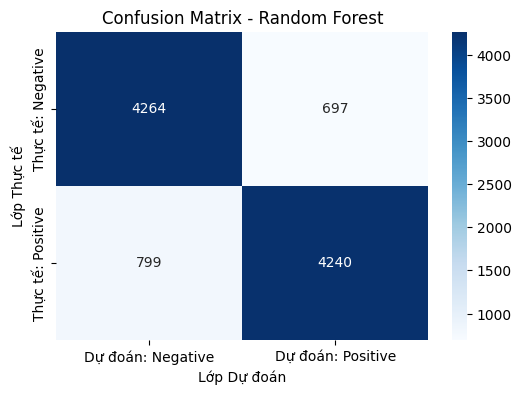

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n========== Đánh giá Mô hình: {model_name} ==========")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['negative', 'positive'])) # Nhớ dùng target_names phù hợp
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    # Hiển thị confusion matrix bằng heatmap cho trực quan
    cm_df = pd.DataFrame(cm, index=['Thực tế: Negative', 'Thực tế: Positive'], columns=['Dự đoán: Negative', 'Dự đoán: Positive'])
    plt.figure(figsize=(6, 4)) # Kích thước nhỏ hơn cho confusion matrix
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues') # annot=True: hiển thị số, fmt='d': định dạng số nguyên
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Lớp Thực tế')
    plt.xlabel('Lớp Dự đoán')
    plt.show() # Hiển thị heatmap

# Đánh giá từng mô hình
evaluate_model("Logistic Regression", y_test, longreg_pred)
evaluate_model("Multinomial Naive Bayes", y_test, nb_pred)
evaluate_model("Linear SVM", y_test, svm_pred)
evaluate_model("Random Forest", y_test, rf_pred)

## Luu mo hinh va Vectorizer

In [52]:
import joblib
print("Dang luu mo hinh va vectorizer...")

model_filename = 'sentiment_logreg_model.joblib'
joblib.dump(logreg_model,model_filename)
print(f'Da luu mo hinh vao file: {model_filename}')

vectorizer_filename='tfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer,vectorizer_filename)
print(f'Da luu TF-IDF Vectorizer vao file: {vectorizer_filename}')
print("Luu hoan tat!")

Dang luu mo hinh va vectorizer...
Da luu mo hinh vao file: sentiment_logreg_model.joblib
Da luu TF-IDF Vectorizer vao file: tfidf_vectorizer.joblib
Luu hoan tat!
